In [1]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
from pathlib import Path

output_dir = Path('../outputs/article')
output_dir.mkdir(parents=True, exist_ok=True)

print(f'Output directory: {output_dir}')

Output directory: ../outputs/article


/home/jaime/FD/xG/notebooks/../src/visualization/timeline_phases.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved: ../outputs/article/timeline_phases.png


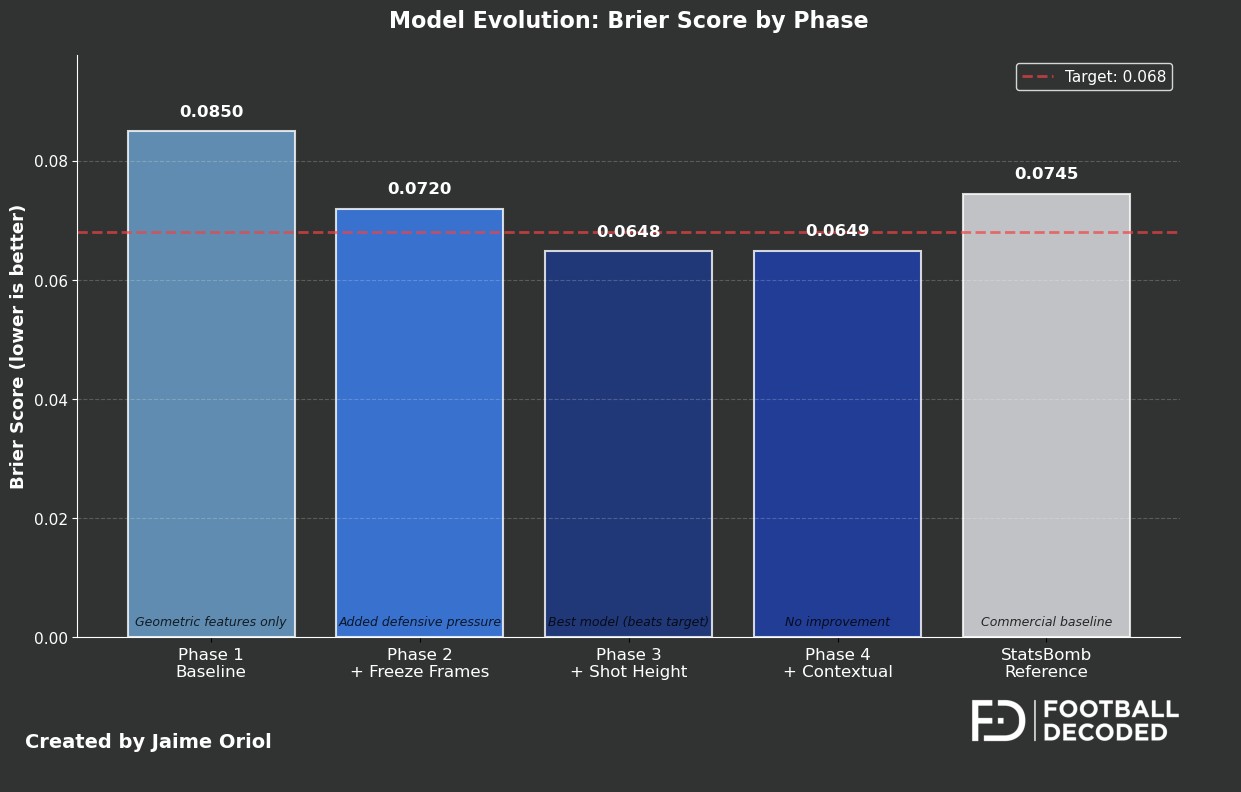

In [2]:
from src.visualization.timeline_phases import plot_timeline_phases

fig = plot_timeline_phases(output_path=output_dir / 'timeline_phases.png')
plt.show()

/home/jaime/FD/xG/notebooks/../src/visualization/feature_importance.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved: ../outputs/article/feature_importance.png


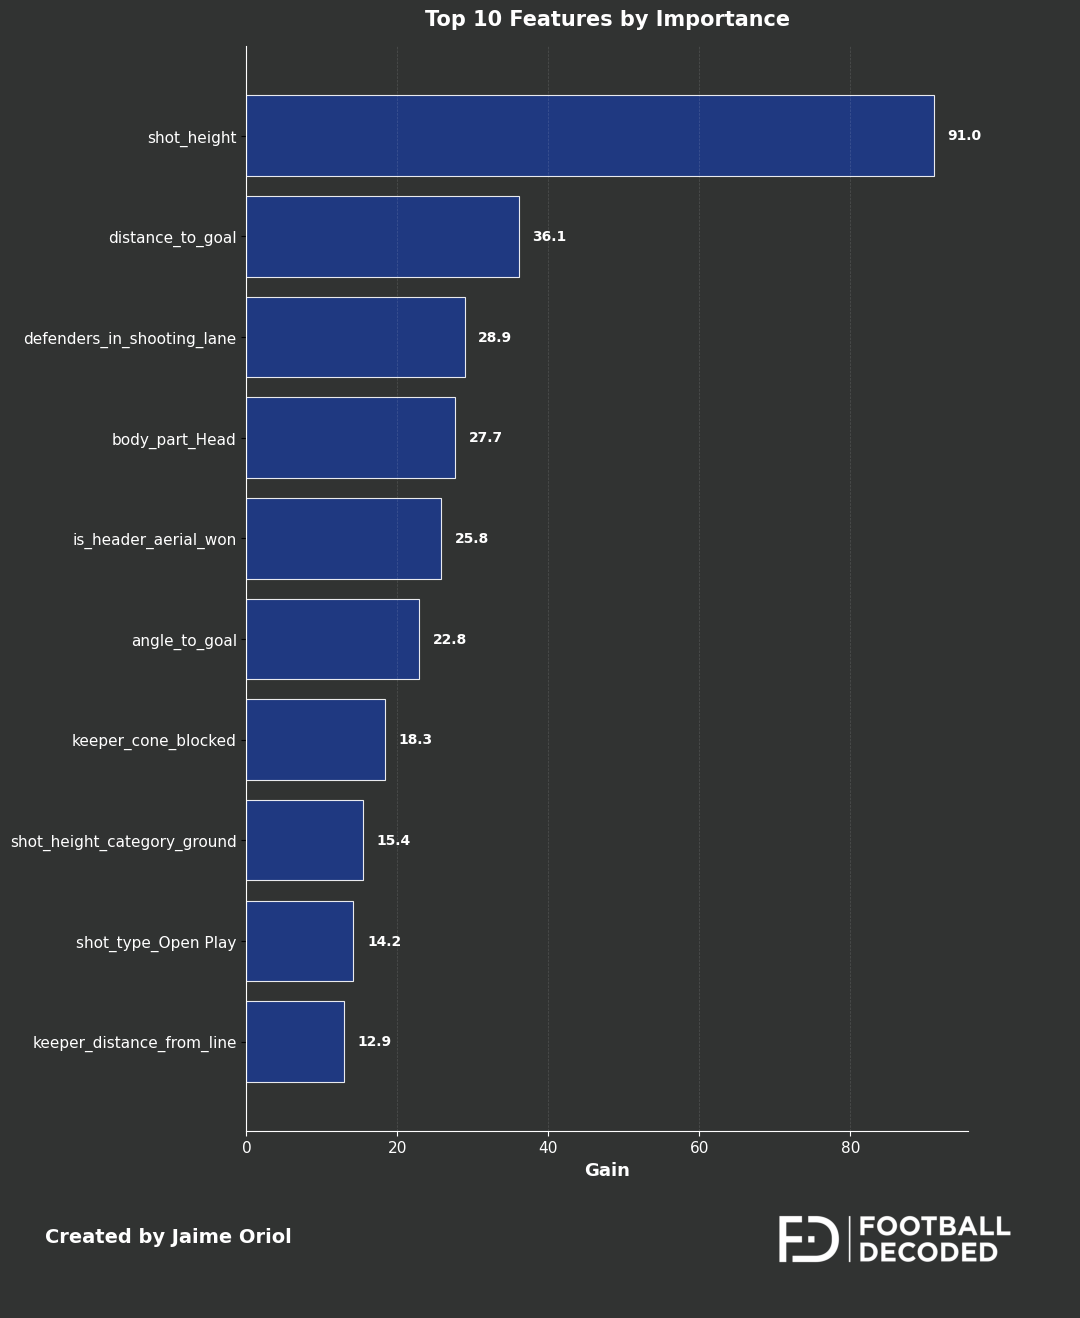

In [3]:
from src.visualization.feature_importance import plot_feature_importance

fig = plot_feature_importance(
    model_path='../models/phase3_tuned.json',
    output_path=output_dir / 'feature_importance.png'
)
plt.show()

In [4]:
from src.visualization.comparison_scatter import plot_comparison_scatter

fig = plot_comparison_scatter(
    model_path='../models/phase3_tuned.json',
    features_path='../models/phase3_features.txt',
    output_path=output_dir / 'comparison_scatter.png'
)
plt.show()

Loading from JSONs (this will take ~5 min)...


KeyError: 'shot_type'

In [ ]:
from src.visualization.comparison_shotmap import plot_comparison_shotmap

fig = plot_comparison_shotmap(
    match_id=None,
    model_path='../models/phase3_tuned.json',
    features_path='../models/phase3_features.txt',
    output_path=output_dir / 'comparison_shotmap.png'
)
plt.show()

Loading from JSONs (this will take ~5 min)...


KeyError: 'shot_type'

In [ ]:
from src.visualization.distribution_plot import plot_distribution_comparison

fig = plot_distribution_comparison(
    model_path='../models/phase3_tuned.json',
    features_path='../models/phase3_features.txt',
    output_path=output_dir / 'distribution_plot.png'
)
plt.show()

Loading from JSONs (this will take ~5 min)...


KeyError: 'shot_type'

In [ ]:
from src.visualization.calibration_plot import plot_calibration

fig = plot_calibration(
    model_path='../models/phase3_tuned.json',
    features_path='../models/phase3_features.txt',
    n_bins=10,
    output_path=output_dir / 'calibration_plot.png'
)
plt.show()

Loading from JSONs (this will take ~5 min)...


KeyError: 'shot_type'

In [ ]:
from src.visualization.xg_heatmap import plot_xg_heatmap

fig = plot_xg_heatmap(
    model_path='../models/phase3_tuned.json',
    features_path='../models/phase3_features.txt'
)
fig.savefig(output_dir / 'xg_heatmap.png', dpi=300, facecolor='#313332', bbox_inches='tight')
plt.show()

In [ ]:
print('All visualizations generated successfully!')
print(f'Output directory: {output_dir}')
print('\nGenerated files:')
for f in sorted(output_dir.glob('*.png')):
    print(f'  - {f.name}')